# Intro

The [National Center for Education Statistics](https://nces.ed.gov/) releases a dataset annually containing the percentage of bachelor's degrees granted to women from 1970 onward. The dataset is broken up into 17 categories of degrees, with each column as a separate category. Randal Olson, a data scientist at University of Pennsylvania, has cleaned the dataset and made it available on his [personal website](http://www.randalolson.com/). You can download the dataset Randal compiled [here](http://www.randalolson.com/wp-content/uploads/percent-bachelors-degrees-women-usa.csv). In this project, we'll be plotting the percentage of degrees awarded to men and women in various degree categories against year.

Let's familiarize ourselves with the dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

women_degrees = pd.read_csv('percent-bachelors-degrees-women-usa.csv')
women_degrees.head()

,Year,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
0,1970,4.229798,11.921005,59.7,29.088363,9.064439,35.3,13.6,74.535328,0.8,65.570923,73.8,77.1,38.0,13.8,44.4,68.4,36.8
1,1971,5.452797,12.003106,59.9,29.394403,9.503187,35.5,13.6,74.149204,1.0,64.556485,73.9,75.5,39.0,14.9,46.2,65.5,36.2
2,1972,7.420710,13.214594,60.4,29.810221,10.558962,36.6,14.9,73.554520,1.2,63.664263,74.6,76.9,40.2,14.8,47.6,62.6,36.1
3,1973,9.653602,14.791613,60.2,31.147915,12.804602,38.4,16.4,73.501814,1.6,62.941502,74.9,77.4,40.9,16.5,50.4,64.3,36.4
4,1974,14.074623,17.444688,61.9,32.996183,16.204850,40.5,18.9,73.336811,2.2,62.413412,75.3,77.9,41.8,18.2,52.6,66.1,37.3


In [2]:
women_degrees.tail()

,Year,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
37,2007,47.605026,43.100459,61.4,59.411993,49.000459,62.5,17.6,78.721413,16.8,67.874923,70.2,85.4,44.1,40.7,77.1,82.1,49.3
38,2008,47.570834,42.711730,60.7,59.305765,48.888027,62.4,17.8,79.196327,16.5,67.594028,70.2,85.2,43.3,40.7,77.2,81.7,49.4
39,2009,48.667224,43.348921,61.0,58.489583,48.840474,62.8,18.1,79.532909,16.8,67.969792,69.3,85.1,43.3,40.7,77.1,82.0,49.4
40,2010,48.730042,42.066721,61.3,59.010255,48.757988,62.5,17.6,79.618625,17.2,67.928106,69.0,85.0,43.1,40.2,77.0,81.7,49.3
41,2011,50.037182,42.773438,61.2,58.742397,48.180418,62.2,18.2,79.432812,17.5,68.426730,69.5,84.8,43.1,40.1,76.7,81.9,49.2


So we have 42 rows of data from 1970 - 2011 with 18 columns, one for `Year` and seventeen for each degree category, each containing the percentage of degrees granted to women. Let's look at the STEM (science, technology, engineering and math) degrees in particular first.

# STEM categories

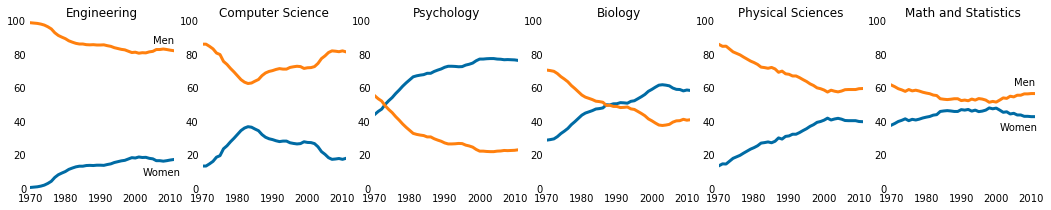

In [3]:
stem_cats = ['Engineering', 'Computer Science', 'Psychology', 'Biology', 'Physical Sciences', 'Math and Statistics']

fig = plt.figure(figsize=(18, 3))

cb_dark_blue = (0/255,107/255,164/255) # colorblind-friendly colors with their RGB values
cb_orange = (255/255, 128/255, 14/255)

for i in range(6):
    ax = fig.add_subplot(1, 6, i+1)
    
    ax.plot(women_degrees.Year, women_degrees[stem_cats[i]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees.Year, 100 - women_degrees[stem_cats[i]], c=cb_orange, label='Men', linewidth=3)
    
    for spine in ax.spines.values(): # hide axes spines
        spine.set_visible(False)
        
    ax.set_xlim(1970, 2011)
    ax.set_ylim(0, 100)
    ax.tick_params(bottom=False, top=False, left=False, right=False)
    ax.set_xticks([1970, 1980, 1990, 2000, 2010])
    
    ax.set_title(stem_cats[i])
    
    if i == 0: # instead of a legend, label the lines of two plots
        ax.text(2005, 87, 'Men')
        ax.text(2002, 8, 'Women')
    elif i == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2001, 35, 'Women')
        
plt.show()

By 2011, men outnumber women in all STEM categories except for Pyschology and Biology, which begin with men outnumbering women but cross over at some point so that women outnumber men.

In Engineering and Physical Sciences, the gender gap gradually decreases over the years, most dramatically in Physical Sciences. The relatively small gender gap in Math and Statistics decreases slightly until around 2000 when it increases to almost mirror the gap of 1970. The trend in Computer Science is similar to the trend in Math and Statistics with the exception of a much larger gender gap which decreases drastically just after 1980.

Let's take a closer look at Psychology and Biology which are interesting because of their reversals in gender gap. When did those crossovers occur exactly?

In [4]:
women_degrees[women_degrees.Psychology < 50][['Year', 'Psychology']].tail(1)

,Year,Psychology
2,1972,47.6


In [5]:
women_degrees[women_degrees.Psychology > 50][['Year', 'Psychology']].head(1)

,Year,Psychology
3,1973,50.4


In Psychology, the gender gap crosses over from 1972 - 1973.

In [6]:
women_degrees[women_degrees.Biology < 50][['Year', 'Biology']].tail(1)

,Year,Biology
16,1986,48.300678


In [7]:
women_degrees[women_degrees.Biology > 50][['Year', 'Biology']].head(1)

,Year,Biology
17,1987,50.209878


In Biology, the gender gap crosses over from 1986 - 1987. Let's now take a look across all categories.

# Comparing across all categories

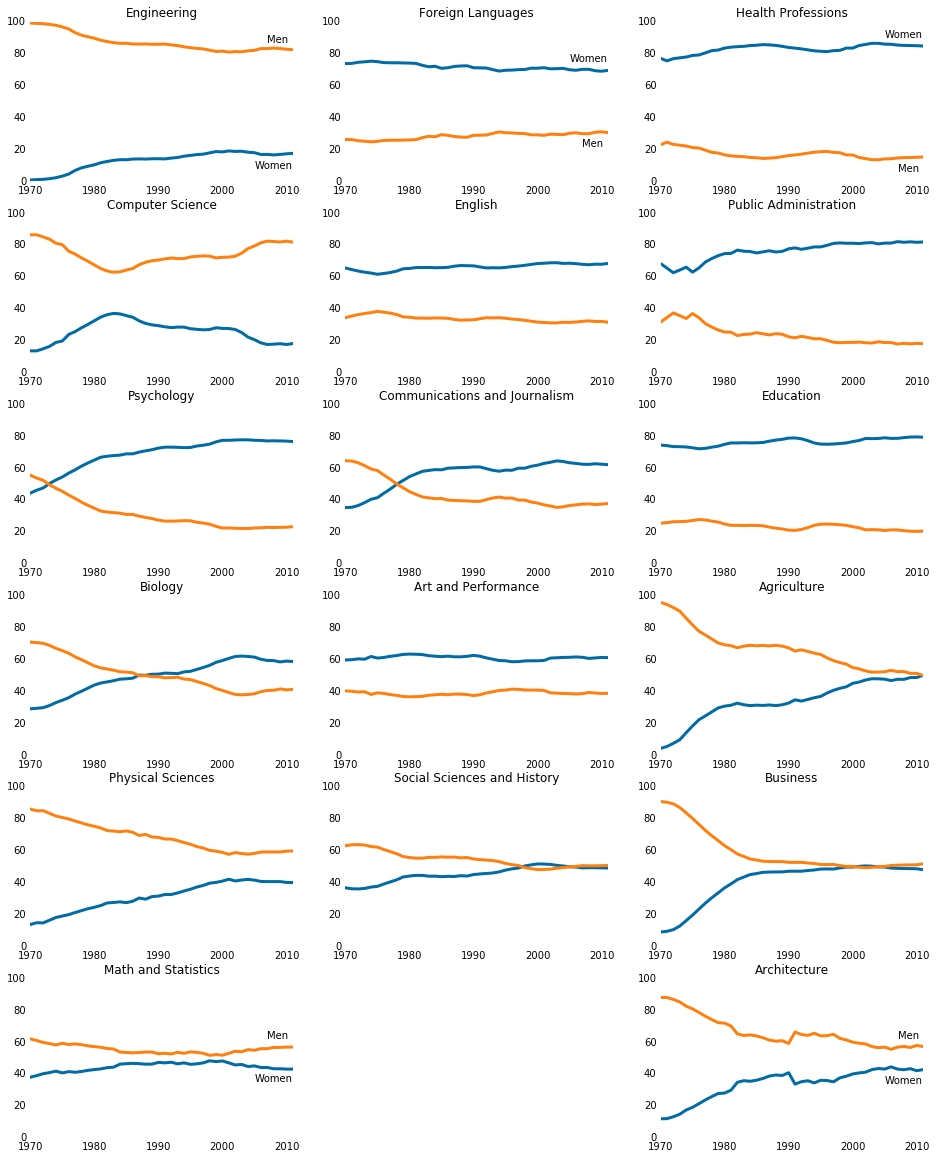

In [8]:
stem_cats = ['Engineering', 'Computer Science', 'Psychology', 'Biology', 'Physical Sciences', 'Math and Statistics']
lib_arts_cats = ['Foreign Languages', 'English', 'Communications and Journalism', 'Art and Performance', 'Social Sciences and History']
other_cats = ['Health Professions', 'Public Administration', 'Education', 'Agriculture', 'Business', 'Architecture']

fig = plt.figure(figsize=(16, 20))

cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255, 128/255, 14/255)

for col in range(3):
    if col == 0: # STEM column built below
        for row in range(6):
            ax = fig.add_subplot(6, 3, 1 + 3*row)
            
            ax.plot(women_degrees.Year, women_degrees[stem_cats[row]], c=cb_dark_blue, linewidth=3)
            ax.plot(women_degrees.Year, 100-women_degrees[stem_cats[row]], c=cb_orange, linewidth=3)
            
            ax.set_title(stem_cats[row])
            
            for spine in ax.spines.values():
                spine.set_visible(False)
                
            ax.set_xlim(1970, 2011)
            ax.set_ylim(0, 100)
            ax.tick_params(bottom=False, top=False, left=False, right=False)
            ax.set_xticks([1970, 1980, 1990, 2000, 2010])
            
            if row == 0: # label first and last plots
                ax.text(2007, 87, 'Men')
                ax.text(2005, 8, 'Women')
            elif row == 5:
                ax.text(2007, 62, 'Men')
                ax.text(2005, 35, 'Women')
                
    if col == 1: # Liberal Arts column built below
        for row in range(5):
            ax = fig.add_subplot(6, 3, 2 + 3*row)
            
            ax.plot(women_degrees.Year, women_degrees[lib_arts_cats[row]], c=cb_dark_blue, linewidth=3)
            ax.plot(women_degrees.Year, 100-women_degrees[lib_arts_cats[row]], c=cb_orange, linewidth=3)
            
            ax.set_title(lib_arts_cats[row])
            
            for spine in ax.spines.values():
                spine.set_visible(False)
                
            ax.set_xlim(1970, 2011)
            ax.set_ylim(0, 100)
            ax.tick_params(bottom=False, top=False, left=False, right=False)
            ax.set_xticks([1970, 1980, 1990, 2000, 2010])
            
            if row == 0: # label first plot
                ax.text(2005, 75, 'Women')
                ax.text(2007, 22, 'Men')
                
    if col == 2: # Other column built below
        for row in range(6):
            ax = fig.add_subplot(6, 3, 3 + 3*row)
            
            ax.plot(women_degrees.Year, women_degrees[other_cats[row]], c=cb_dark_blue, linewidth=3)
            ax.plot(women_degrees.Year, 100-women_degrees[other_cats[row]], c=cb_orange, linewidth=3)
            
            ax.set_title(other_cats[row])
            
            for spine in ax.spines.values():
                spine.set_visible(False)
                
            ax.set_xlim(1970, 2011)
            ax.set_ylim(0, 100)
            ax.tick_params(bottom=False, top=False, left=False, right=False)
            ax.set_xticks([1970, 1980, 1990, 2000, 2010])
            
            if row == 0: # label first and last plots
                ax.text(2005, 90, 'Women')
                ax.text(2007, 6, 'Men')
            elif row == 5:
                ax.text(2007, 62, 'Men')
                ax.text(2005, 34, 'Women')
                
plt.show()

Everything looks great, but some small improvements can be made to improve readability and reduce clutter. Since the x-axis always ranges from 1970 to 2011, we can remove redundant labels and leave only x-axis labels for the bottommost plots.

# Hiding x-axis labels

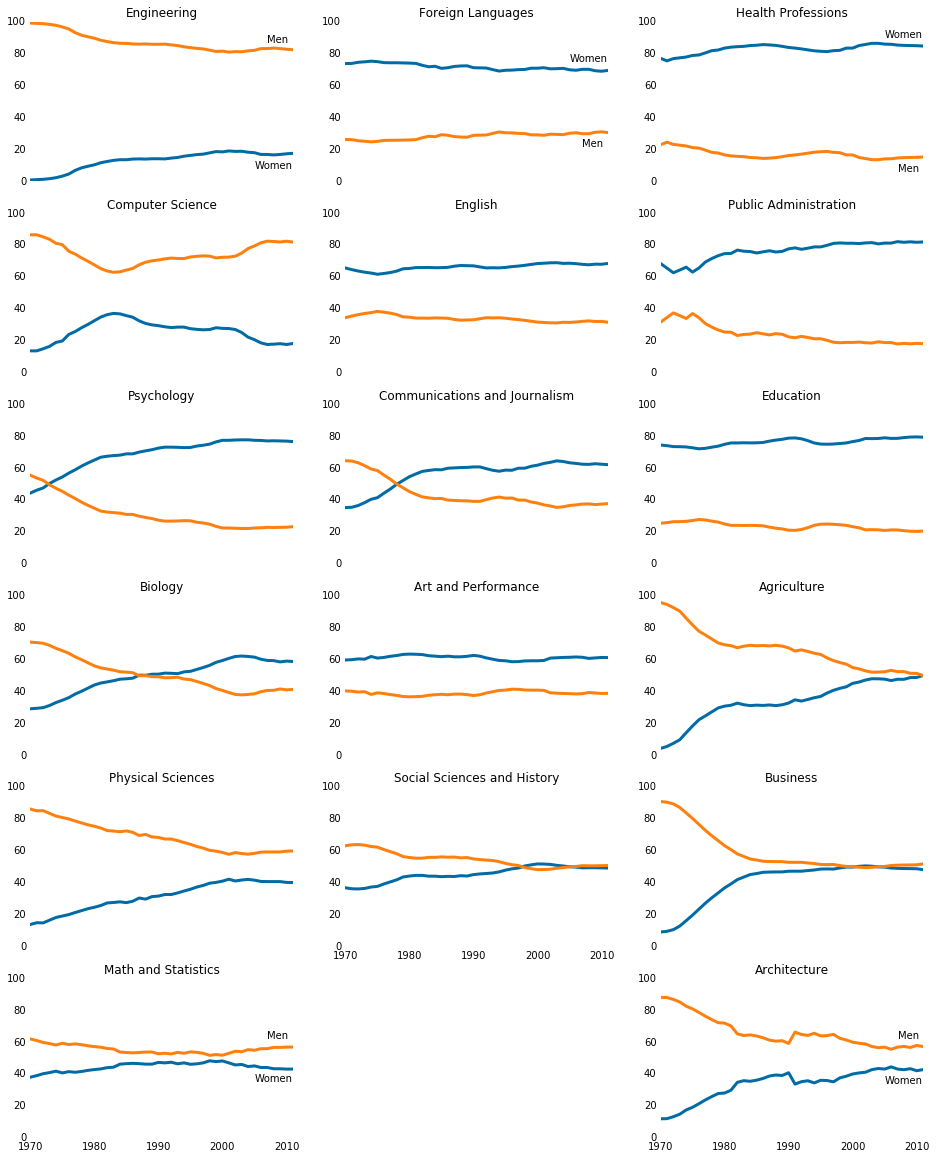

In [9]:
fig = plt.figure(figsize=(16, 20))

for col in range(3):
    if col == 0: # STEM column built below
        for row in range(6):
            ax = fig.add_subplot(6, 3, 1 + 3*row)
            
            ax.plot(women_degrees.Year, women_degrees[stem_cats[row]], c=cb_dark_blue, linewidth=3)
            ax.plot(women_degrees.Year, 100-women_degrees[stem_cats[row]], c=cb_orange, linewidth=3)
            
            ax.set_title(stem_cats[row])
            
            for spine in ax.spines.values():
                spine.set_visible(False)
                
            ax.set_xlim(1970, 2011)
            ax.set_ylim(0, 100)
            ax.tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False) # hide x-axis label
            ax.set_xticks([1970, 1980, 1990, 2000, 2010])
            
            if row == 0: # label first and last plots
                ax.text(2007, 87, 'Men')
                ax.text(2005, 8, 'Women')
            elif row == 5:
                ax.text(2007, 62, 'Men')
                ax.text(2005, 35, 'Women')
                ax.tick_params(labelbottom=True) # show x-axis label for last plot
                
    if col == 1: # Liberal Arts column built below
        for row in range(5):
            ax = fig.add_subplot(6, 3, 2 + 3*row)
            
            ax.plot(women_degrees.Year, women_degrees[lib_arts_cats[row]], c=cb_dark_blue, linewidth=3)
            ax.plot(women_degrees.Year, 100-women_degrees[lib_arts_cats[row]], c=cb_orange, linewidth=3)
            
            ax.set_title(lib_arts_cats[row])
            
            for spine in ax.spines.values():
                spine.set_visible(False)
                
            ax.set_xlim(1970, 2011)
            ax.set_ylim(0, 100)
            ax.tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False) # hide x-axis label
            ax.set_xticks([1970, 1980, 1990, 2000, 2010])
            
            if row == 0: # label first plot
                ax.text(2005, 75, 'Women')
                ax.text(2007, 22, 'Men')
            if row == 4:
                ax.tick_params(labelbottom=True) # show x-axis label for last plot
                
    if col == 2: # Other column built below
        for row in range(6):
            ax = fig.add_subplot(6, 3, 3 + 3*row)
            
            ax.plot(women_degrees.Year, women_degrees[other_cats[row]], c=cb_dark_blue, linewidth=3)
            ax.plot(women_degrees.Year, 100-women_degrees[other_cats[row]], c=cb_orange, linewidth=3)
            
            ax.set_title(other_cats[row])
            
            for spine in ax.spines.values():
                spine.set_visible(False)
                
            ax.set_xlim(1970, 2011)
            ax.set_ylim(0, 100)
            ax.tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False) # hide x-axis label
            ax.set_xticks([1970, 1980, 1990, 2000, 2010])
            
            if row == 0: # label first and last plots
                ax.text(2005, 90, 'Women')
                ax.text(2007, 6, 'Men')
            elif row == 5:
                ax.text(2007, 62, 'Men')
                ax.text(2005, 34, 'Women')
                ax.tick_params(labelbottom=True) # show x-axis label for last plot
                
plt.show()

Much cleaner looking! Now let's turn our attention to the y-axis. Rather than show y-axis labels in increments of 20, let's simply show the y-axis ranges from 0 to 100. Then we can add a semi-transparent gray line indicating the 50% level. This way, clutter is vastly reduced yet the reader still understands the plots and can easily see the most relevant information.

# Simplifying y-axis and adding 50% line

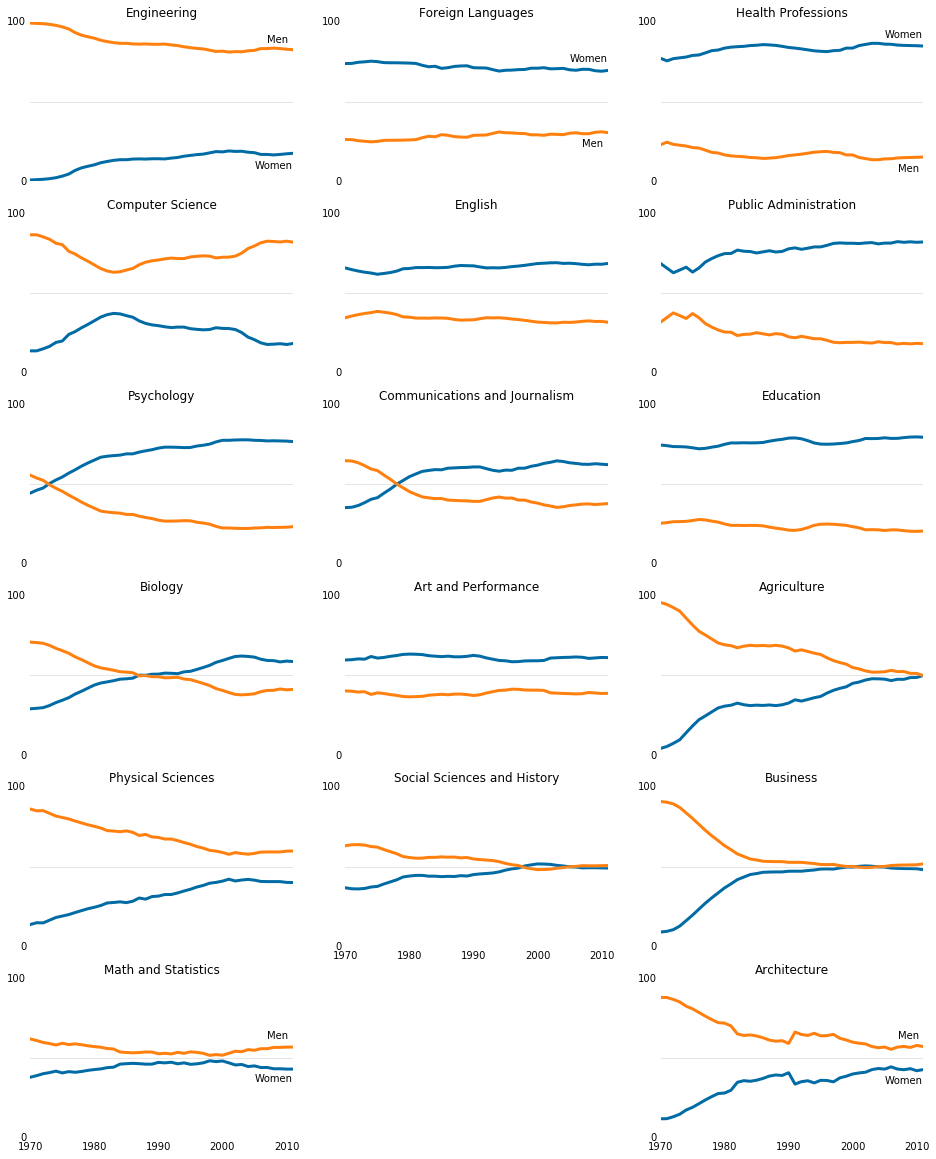

In [10]:
fig = plt.figure(figsize=(16, 20))

cb_gray = (171/255, 171/255, 171/255) # colorblind-friendly gray RGB values

for col in range(3):
    if col == 0: # STEM column built below
        for row in range(6):
            ax = fig.add_subplot(6, 3, 1 + 3*row)
            
            ax.plot(women_degrees.Year, women_degrees[stem_cats[row]], c=cb_dark_blue, linewidth=3)
            ax.plot(women_degrees.Year, 100-women_degrees[stem_cats[row]], c=cb_orange, linewidth=3)
            
            ax.set_title(stem_cats[row])
            
            for spine in ax.spines.values():
                spine.set_visible(False)
                
            ax.set_xlim(1970, 2011)
            ax.set_ylim(0, 100)
            ax.tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False)
            ax.set_xticks([1970, 1980, 1990, 2000, 2010])
            ax.set_yticks([0, 100]) # simplify y-axis ticks
            ax.axhline(50, c=cb_gray, alpha=0.3) # add 50% line
            
            if row == 0: # label first and last plots
                ax.text(2007, 87, 'Men')
                ax.text(2005, 8, 'Women')
            elif row == 5:
                ax.text(2007, 62, 'Men')
                ax.text(2005, 35, 'Women')
                ax.tick_params(labelbottom=True)
                
    if col == 1: # Liberal Arts column built below
        for row in range(5):
            ax = fig.add_subplot(6, 3, 2 + 3*row)
            
            ax.plot(women_degrees.Year, women_degrees[lib_arts_cats[row]], c=cb_dark_blue, linewidth=3)
            ax.plot(women_degrees.Year, 100-women_degrees[lib_arts_cats[row]], c=cb_orange, linewidth=3)
            
            ax.set_title(lib_arts_cats[row])
            
            for spine in ax.spines.values():
                spine.set_visible(False)
                
            ax.set_xlim(1970, 2011)
            ax.set_ylim(0, 100)
            ax.tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False)
            ax.set_xticks([1970, 1980, 1990, 2000, 2010])
            ax.set_yticks([0, 100]) # simplify y-axis ticks
            ax.axhline(50, c=cb_gray, alpha=0.3) # add 50% line
            
            if row == 0: # label first plot
                ax.text(2005, 75, 'Women')
                ax.text(2007, 22, 'Men')
            if row == 4:
                ax.tick_params(labelbottom=True)
                
    if col == 2: # Other column built below
        for row in range(6):
            ax = fig.add_subplot(6, 3, 3 + 3*row)
            
            ax.plot(women_degrees.Year, women_degrees[other_cats[row]], c=cb_dark_blue, linewidth=3)
            ax.plot(women_degrees.Year, 100-women_degrees[other_cats[row]], c=cb_orange, linewidth=3)
            
            ax.set_title(other_cats[row])
            
            for spine in ax.spines.values():
                spine.set_visible(False)
                
            ax.set_xlim(1970, 2011)
            ax.set_ylim(0, 100)
            ax.tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False)
            ax.set_xticks([1970, 1980, 1990, 2000, 2010])
            ax.set_yticks([0, 100]) # simplify y-axis ticks
            ax.axhline(50, c=cb_gray, alpha=0.3) # add 50% line
            
            if row == 0: # label first and last plots
                ax.text(2005, 90, 'Women')
                ax.text(2007, 6, 'Men')
            elif row == 5:
                ax.text(2007, 62, 'Men')
                ax.text(2005, 34, 'Women')
                ax.tick_params(labelbottom=True)
                
plt.show()

Even better! Let's go ahead and export to file.

# Exporting to file

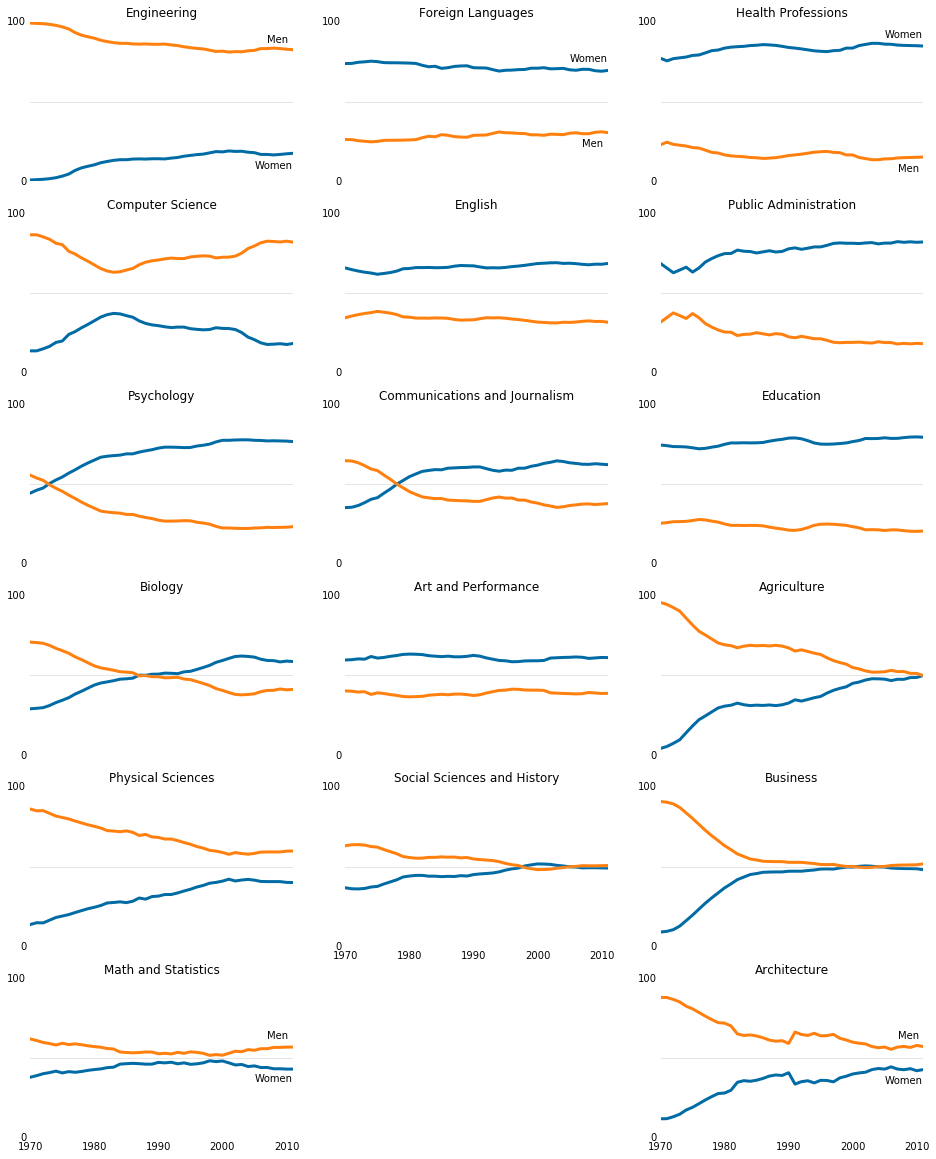

In [11]:
fig = plt.figure(figsize=(16, 20))

for col in range(3):
    if col == 0: # STEM column built below
        for row in range(6):
            ax = fig.add_subplot(6, 3, 1 + 3*row)
            
            ax.plot(women_degrees.Year, women_degrees[stem_cats[row]], c=cb_dark_blue, linewidth=3)
            ax.plot(women_degrees.Year, 100-women_degrees[stem_cats[row]], c=cb_orange, linewidth=3)
            
            ax.set_title(stem_cats[row])
            
            for spine in ax.spines.values():
                spine.set_visible(False)
                
            ax.set_xlim(1970, 2011)
            ax.set_ylim(0, 100)
            ax.tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False)
            ax.set_xticks([1970, 1980, 1990, 2000, 2010])
            ax.set_yticks([0, 100])
            ax.axhline(50, c=cb_gray, alpha=0.3)
            
            if row == 0: # label first and last plots
                ax.text(2007, 87, 'Men')
                ax.text(2005, 8, 'Women')
            elif row == 5:
                ax.text(2007, 62, 'Men')
                ax.text(2005, 35, 'Women')
                ax.tick_params(labelbottom=True)
                
    if col == 1: # Liberal Arts column built below
        for row in range(5):
            ax = fig.add_subplot(6, 3, 2 + 3*row)
            
            ax.plot(women_degrees.Year, women_degrees[lib_arts_cats[row]], c=cb_dark_blue, linewidth=3)
            ax.plot(women_degrees.Year, 100-women_degrees[lib_arts_cats[row]], c=cb_orange, linewidth=3)
            
            ax.set_title(lib_arts_cats[row])
            
            for spine in ax.spines.values():
                spine.set_visible(False)
                
            ax.set_xlim(1970, 2011)
            ax.set_ylim(0, 100)
            ax.tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False)
            ax.set_xticks([1970, 1980, 1990, 2000, 2010])
            ax.set_yticks([0, 100])
            ax.axhline(50, c=cb_gray, alpha=0.3)
            
            if row == 0: # label first plot
                ax.text(2005, 75, 'Women')
                ax.text(2007, 22, 'Men')
            if row == 4:
                ax.tick_params(labelbottom=True)
                
    if col == 2: # Other column built below
        for row in range(6):
            ax = fig.add_subplot(6, 3, 3 + 3*row)
            
            ax.plot(women_degrees.Year, women_degrees[other_cats[row]], c=cb_dark_blue, linewidth=3)
            ax.plot(women_degrees.Year, 100-women_degrees[other_cats[row]], c=cb_orange, linewidth=3)
            
            ax.set_title(other_cats[row])
            
            for spine in ax.spines.values():
                spine.set_visible(False)
                
            ax.set_xlim(1970, 2011)
            ax.set_ylim(0, 100)
            ax.tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False)
            ax.set_xticks([1970, 1980, 1990, 2000, 2010])
            ax.set_yticks([0, 100])
            ax.axhline(50, c=cb_gray, alpha=0.3)
            
            if row == 0: # label first and last plots
                ax.text(2005, 90, 'Women')
                ax.text(2007, 6, 'Men')
            elif row == 5:
                ax.text(2007, 62, 'Men')
                ax.text(2005, 34, 'Women')
                ax.tick_params(labelbottom=True)
                
plt.savefig('gender_degrees.png') # export to file
plt.show()